<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_1X/blob/main/GQtest_data(y_hat)_multi_delta_(_2)_n250_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_1X/multiplication_delta_-2'

In [4]:
os.listdir(base_path)

['data_multi_delta_-2_n20.csv',
 'data_multi_delta_-2_n30.csv',
 'data_multi_delta_-2_n60.csv',
 'data_multi_delta_-2_n120.csv',
 'data_multi_delta_-2_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-2_n250.csv')
pd.read_csv(file_path)

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,67.852013,0.013357,77.865370,77.851365,0.014005
1,0.0,1.0,22.406761,0.010981,32.417742,32.401870,0.015873
2,0.0,2.0,58.900485,-0.013010,68.887475,68.899001,-0.011526
3,0.0,3.0,67.948099,0.009538,77.957636,77.947460,0.010176
4,0.0,4.0,75.092576,0.009253,85.101829,85.092605,0.009224
...,...,...,...,...,...,...,...
249995,999.0,245.0,21.880281,-0.077753,31.802528,31.875849,-0.073321
249996,999.0,246.0,21.273491,0.077828,31.351319,31.269011,0.082308
249997,999.0,247.0,41.153223,-0.009426,51.143797,51.150339,-0.006542
249998,999.0,248.0,55.039168,-0.030602,65.008566,65.037399,-0.028833


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,67.852013,0.013357,77.865370,77.851365,0.014005
1,0.0,1.0,22.406761,0.010981,32.417742,32.401870,0.015873
2,0.0,2.0,58.900485,-0.013010,68.887475,68.899001,-0.011526
3,0.0,3.0,67.948099,0.009538,77.957636,77.947460,0.010176
4,0.0,4.0,75.092576,0.009253,85.101829,85.092605,0.009224
...,...,...,...,...,...,...,...
249995,999.0,245.0,21.880281,-0.077753,31.802528,31.875849,-0.073321
249996,999.0,246.0,21.273491,0.077828,31.351319,31.269011,0.082308
249997,999.0,247.0,41.153223,-0.009426,51.143797,51.150339,-0.006542
249998,999.0,248.0,55.039168,-0.030602,65.008566,65.037399,-0.028833


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         e          Y      y_hat     e_hat
rep   index                                                     
0.0   0.0    67.852013  0.013357  77.865370  77.851365  0.014005
      1.0    22.406761  0.010981  32.417742  32.401870  0.015873
      2.0    58.900485 -0.013010  68.887475  68.899001 -0.011526
      3.0    67.948099  0.009538  77.957636  77.947460  0.010176
      4.0    75.092576  0.009253  85.101829  85.092605  0.009224
...                ...       ...        ...        ...       ...
999.0 245.0  21.880281 -0.077753  31.802528  31.875849 -0.073321
      246.0  21.273491  0.077828  31.351319  31.269011  0.082308
      247.0  41.153223 -0.009426  51.143797  51.150339 -0.006542
      248.0  55.039168 -0.030602  65.008566  65.037399 -0.028833
      249.0  30.867747  0.000092  40.867838  40.864037  0.003802

[250000 rows x 5 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         e          Y      y_hat     e_hat
rep   index                                                     
0.0   0.0    67.852013  0.013357  77.865370  77.851365  0.014005
      1.0    22.406761  0.010981  32.417742  32.401870  0.015873
      2.0    58.900485 -0.013010  68.887475  68.899001 -0.011526
      3.0    67.948099  0.009538  77.957636  77.947460  0.010176
      4.0    75.092576  0.009253  85.101829  85.092605  0.009224
...                ...       ...        ...        ...       ...
999.0 245.0  21.880281 -0.077753  31.802528  31.875849 -0.073321
      246.0  21.273491  0.077828  31.351319  31.269011  0.082308
      247.0  41.153223 -0.009426  51.143797  51.150339 -0.006542
      248.0  55.039168 -0.030602  65.008566  65.037399 -0.028833
      249.0  30.867747  0.000092  40.867838  40.864037  0.003802

[250000 rows x 5 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,67.852013,0.013357,77.865370,77.851365,0.014005
1,0.0,1.0,22.406761,0.010981,32.417742,32.401870,0.015873
2,0.0,2.0,58.900485,-0.013010,68.887475,68.899001,-0.011526
3,0.0,3.0,67.948099,0.009538,77.957636,77.947460,0.010176
4,0.0,4.0,75.092576,0.009253,85.101829,85.092605,0.009224
...,...,...,...,...,...,...,...
249995,999.0,245.0,21.880281,-0.077753,31.802528,31.875849,-0.073321
249996,999.0,246.0,21.273491,0.077828,31.351319,31.269011,0.082308
249997,999.0,247.0,41.153223,-0.009426,51.143797,51.150339,-0.006542
249998,999.0,248.0,55.039168,-0.030602,65.008566,65.037399,-0.028833


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         e          Y      y_hat     e_hat
rep   index                                                     
0.0   0.0    67.852013  0.013357  77.865370  77.851365  0.014005
      1.0    22.406761  0.010981  32.417742  32.401870  0.015873
      2.0    58.900485 -0.013010  68.887475  68.899001 -0.011526
      3.0    67.948099  0.009538  77.957636  77.947460  0.010176
      4.0    75.092576  0.009253  85.101829  85.092605  0.009224
...                ...       ...        ...        ...       ...
999.0 245.0  21.880281 -0.077753  31.802528  31.875849 -0.073321
      246.0  21.273491  0.077828  31.351319  31.269011  0.082308
      247.0  41.153223 -0.009426  51.143797  51.150339 -0.006542
      248.0  55.039168 -0.030602  65.008566  65.037399 -0.028833
      249.0  30.867747  0.000092  40.867838  40.864037  0.003802

[250000 rows x 5 columns]

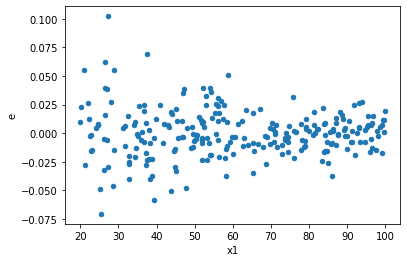

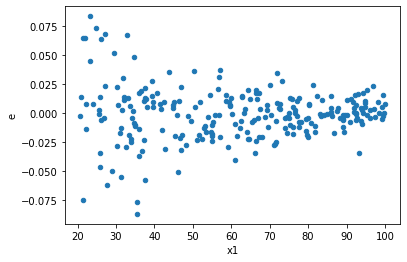

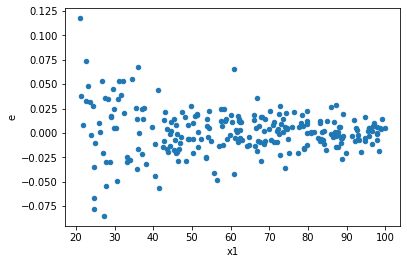

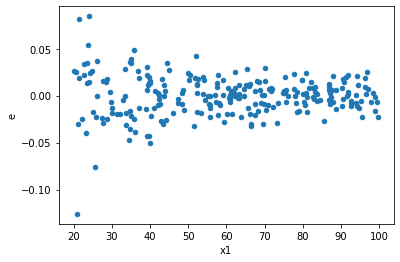

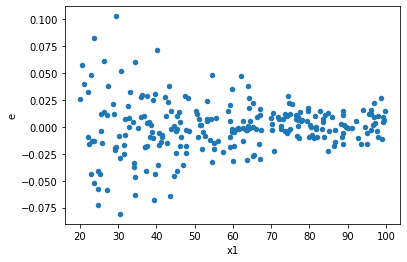

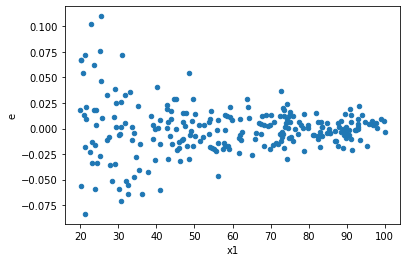

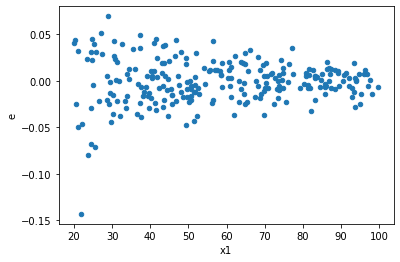

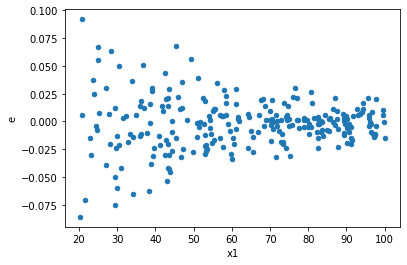

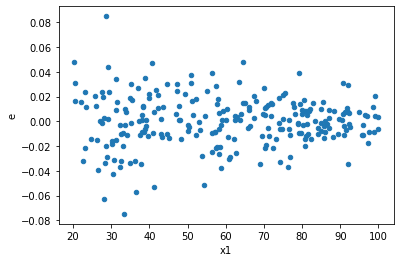

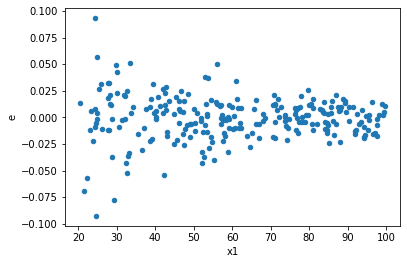

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x1', y='e', kind = 'scatter')
tablenew1.plot(x ='x1', y='e', kind = 'scatter')
tablenew2.plot(x ='x1', y='e', kind = 'scatter')
tablenew3.plot(x ='x1', y='e', kind = 'scatter')
tablenew4.plot(x ='x1', y='e', kind = 'scatter')
tablenew5.plot(x ='x1', y='e', kind = 'scatter')
tablenew6.plot(x ='x1', y='e', kind = 'scatter')
tablenew7.plot(x ='x1', y='e', kind = 'scatter')
tablenew8.plot(x ='x1', y='e', kind = 'scatter')
tablenew9.plot(x ='x1', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,99.0,99.0,0.09788382589117896,0.014102774088304708,0.0009887255140523126,0.00014245226351822937,0.14407665372605358,2.4604907990001954e-19,Reject005=0 : Heteroscedasticity
1.0,99.0,99.0,0.09455482459099111,0.01476075663328119,0.0009550992382928395,0.00014909855185132515,0.15610791619709216,4.739233402551677e-18,Reject005=0 : Heteroscedasticity
2.0,99.0,99.0,0.09658082804280825,0.013511986746063636,0.0009755639196243257,0.0001364847146067034,0.13990340546753874,8.178693963847906e-20,Reject005=0 : Heteroscedasticity
3.0,99.0,99.0,0.08972582006221738,0.01604458998623971,0.0009063214147698725,0.0001620665655175728,0.17881798099046764,6.007289885414983e-16,Reject005=0 : Heteroscedasticity
4.0,99.0,99.0,0.10313701354279643,0.011989791980819368,0.0010417880155838023,0.00012110900990726634,0.11625110684288173,6.495790805360139e-23,Reject005=0 : Heteroscedasticity
5.0,99.0,99.0,0.07793460551854242,0.013774661486514897,0.0007872182375610345,0.00013913799481328178,0.17674640674530123,3.9995972449794697e-16,Reject005=0 : Heteroscedasticity
6.0,99.0,99.0,0.12475120813110782,0.016051901842048695,0.0012601132134455336,0.0001621404226469565,0.12867131374935367,3.385920804243631e-21,Reject005=0 : Heteroscedasticity
7.0,99.0,99.0,0.0949770453992578,0.01412576850841985,0.000959364094941998,0.00014268453038807929,0.14872823690228454,8.010217116299269e-19,Reject005=0 : Heteroscedasticity
8.0,99.0,99.0,0.06934727430148102,0.012205072957191625,0.000700477518196778,0.00012328356522415783,0.17599931763909235,3.448394435795358e-16,Reject005=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    1000
Name: Result_test, dtype: int64